In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#ds = r"C:\Users\elvis\OneDrive\Documents\NEU STUDIES FOLDER\ALY6140\Persons in Crisis - Calls for Service Attended.csv"
ds = r"/Users/Nithin/Documents/NEU/Sem-4/ALY-6140/Project/Persons_in_Crisis_Calls_for_Service_Attended.csv"
data = pd.read_csv(ds)

# Data Overview

In [4]:
#Checking the number of rows and columns
print(data.shape)

#Displaying the first few rows of the dataset
print(f"Data overview: {data.head()}")

#Checking basic statistics for numerical columns

print(f"Numerical Statistics: {data.describe()}")

#Checking the data types of each column

print(f"Data Types: {data.dtypes}")

#Checking for missing values in the dataset

print(f"Missing Values: {data.isnull().sum()}")

#Checking for duplicate rows
print(f"Duplicate Rows: {data.duplicated().sum()}")


(309103, 16)
Data overview:    _id  OBJECTID  EVENT_ID  EVENT_DATE  EVENT_YEAR EVENT_MONTH  EVENT_DOW  \
0    1         1   1254936  2014-01-01        2014     January  Wednesday   
1    2         2   1255246  2014-01-01        2014     January  Wednesday   
2    3         3   1255486  2014-01-01        2014     January  Wednesday   
3    4         4   1254356  2014-01-01        2014     January  Wednesday   
4    5         5   1253198  2014-01-01        2014     January  Wednesday   

   EVENT_HOUR        EVENT_TYPE DIVISION OCCURRENCE_CREATED APPREHENSION_MADE  \
0         9.0  Person in Crisis      D22                Yes                No   
1        11.0   Suicide-related      D13                Yes               Yes   
2        12.0  Person in Crisis      D52                 No                No   
3         5.0   Suicide-related      D43                 No                No   
4         1.0   Suicide-related      D53                 No                No   

  HOOD_158            

# Data Cleaning


Missing Values:
_id                   0
OBJECTID              0
EVENT_ID              0
EVENT_DATE            0
EVENT_YEAR            0
EVENT_MONTH           0
EVENT_DOW             0
EVENT_HOUR            0
EVENT_TYPE            0
DIVISION              0
OCCURRENCE_CREATED    0
APPREHENSION_MADE     0
HOOD_158              0
NEIGHBOURHOOD_158     0
HOOD_140              0
NEIGHBOURHOOD_140     0
dtype: int64


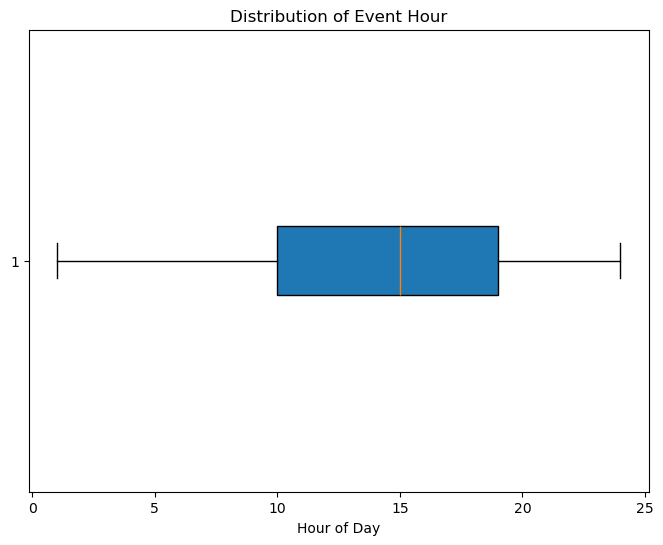

_id                            int64
OBJECTID                       int64
EVENT_ID                       int64
EVENT_DATE            datetime64[ns]
EVENT_YEAR                     int64
EVENT_MONTH           string[python]
EVENT_DOW             string[python]
EVENT_HOUR                     int64
EVENT_TYPE            string[python]
DIVISION              string[python]
OCCURRENCE_CREATED    string[python]
APPREHENSION_MADE     string[python]
HOOD_158              string[python]
NEIGHBOURHOOD_158     string[python]
HOOD_140              string[python]
NEIGHBOURHOOD_140     string[python]
dtype: object

Unique values in DIVISION: <StringArray>
['D22', 'D13', 'D52', 'D43', 'D53', 'D54', 'D51', 'D11', 'D23', 'D32', 'D41',
 'D42', 'D31', 'D33', 'D14', 'D12', 'D55', 'NSA']
Length: 18, dtype: string
Unique values in APPREHENSION_MADE: <StringArray>
['No', 'Yes']
Length: 2, dtype: string
Empty DataFrame
Columns: [_id, OBJECTID, EVENT_ID, EVENT_DATE, EVENT_YEAR, EVENT_MONTH, EVENT_DOW, EVENT_HOUR

,_id,OBJECTID,EVENT_ID,EVENT_DATE,EVENT_YEAR,EVENT_MONTH,EVENT_DOW,EVENT_HOUR,EVENT_TYPE,DIVISION,OCCURRENCE_CREATED,APPREHENSION_MADE,NEIGHBOURHOOD_158,NEIGHBOURHOOD_140,IS_WEEKEND,WEEKEND_LABEL,event_hour_weekend,day_of_week,month,total_events_neighborhood
0,1,1,1254936,2014-01-01,2014,January,Wednesday,9,Person in Crisis,d22,Yes,0,islington (158),Islington-City Centre West (14),0,No,0,2,1,1658
1,2,2,1255246,2014-01-01,2014,January,Wednesday,11,Suicide-related,d13,Yes,1,corso italia-davenport (92),Corso Italia-Davenport (92),0,No,0,2,1,1529
2,3,3,1255486,2014-01-01,2014,January,Wednesday,12,Person in Crisis,d52,No,0,kensington-chinatown (78),Kensington-Chinatown (78),0,No,0,2,1,8177
3,4,4,1254356,2014-01-01,2014,January,Wednesday,5,Suicide-related,d43,No,0,west hill (136),West Hill (136),0,No,0,2,1,4719
4,5,5,1253198,2014-01-01,2014,January,Wednesday,1,Suicide-related,d53,No,0,annex (95),Annex (95),0,No,0,2,1,7133


In [5]:
#1. Replacing missing values in EVENT_HOUR with 24
data['EVENT_HOUR'].fillna(24, inplace=True)

#Checking for missing values in the dataset
print("\nMissing Values:")
print(data.isnull().sum())

#Distribution of Event Hour
plt.figure(figsize=(8, 6))
plt.boxplot(data['EVENT_HOUR'], vert=False, patch_artist=True)
plt.title('Distribution of Event Hour')
plt.xlabel('Hour of Day')
plt.show()

# 2. Converting all object columns to string type and float64 to integer type
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].astype('string')

float64_columns = data.select_dtypes(include=['float64']).columns
data[float64_columns] = data[float64_columns].astype('int')

# 3. Converting `EVENT_DATE` to `datetime` format
data['EVENT_DATE'] = pd.to_datetime(data['EVENT_DATE'], errors='coerce')

#Verifying data types
print(data.dtypes)

# 4. Checking for any inconsistencies in categorical columns like `DIVISION` and `APPREHENSION_MADE`
print("\nUnique values in DIVISION:", data['DIVISION'].unique())
print("Unique values in APPREHENSION_MADE:", data['APPREHENSION_MADE'].unique())

# 5. Converting all categorical columns to lowercase for consistency
categorical_columns = ['DIVISION', 'APPREHENSION_MADE', 'NEIGHBOURHOOD_158']
for col in categorical_columns:
    data[col] = data[col].str.lower()

# 6. Droping unnecessary columns
data.drop(columns=['HOOD_158', 'HOOD_140'], inplace=True)


# 7. Dropping duplicate rows, if any
data.drop_duplicates(inplace=True)

# 8. Checking for negative values in EVENT_HOUR
inconsistent_hours = data[data['EVENT_HOUR'] < 0]
print(inconsistent_hours)

# 9. Standardizing binary values
data['APPREHENSION_MADE'] = data['APPREHENSION_MADE'].replace({'yes': '1' , 'no': '0'})
print("Unique values in APPREHENSION_MADE:", data['APPREHENSION_MADE'].unique())

# 10. Add a column to indicate whether the event occurred on a weekend
data['IS_WEEKEND'] = data['EVENT_DOW'].isin(['Saturday', 'Sunday']).astype(int)

# 11. Creating a new column 'WEEKEND_LABEL' with 'Yes' for 1 and 'No' for 0
data['WEEKEND_LABEL'] = data['IS_WEEKEND'].apply(lambda x: 'Yes' if x == 1 else 'No')

#12. Interacting features
data['event_hour_weekend'] = data['EVENT_HOUR'] * data['IS_WEEKEND']

# Extract temporal features
data['day_of_week'] = data['EVENT_DATE'].dt.dayofweek  # Monday=0, Sunday=6
data['month'] = data['EVENT_DATE'].dt.month

# Creating aggregate features (example: total events per neighborhood)
data['combined_neighborhood'] = data['NEIGHBOURHOOD_158'].astype(str) + "_" + data['NEIGHBOURHOOD_140'].astype(str)
data['total_events_neighborhood'] = data.groupby('combined_neighborhood')['EVENT_ID'].transform('count')
data.drop(columns='combined_neighborhood', inplace=True)


# Verifying the new column
data.head()

# Feture Engineering

In [6]:
# Extracting features from the date
data['EVENT_YEAR'] = data['EVENT_DATE'].dt.year
data['EVENT_MONTH'] = data['EVENT_DATE'].dt.month  # Numerical representation (1-12)
data['EVENT_DOW'] = data['EVENT_DATE'].dt.dayofweek  # 0-6 (Monday-Sunday)

# Creating a binary feature for weekends
data['IS_WEEKEND'] = data['EVENT_DOW'].apply(lambda x: 1 if x >= 5 else 0)  # Saturday=5, Sunday=6

# Cyclic encoding for EVENT_HOUR (assuming 24-hour format)
data['hour_sin'] = np.sin(2 * np.pi * data['EVENT_HOUR'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['EVENT_HOUR'] / 24)

# Cyclic encoding for EVENT_DOW (0-6)
data['dow_sin'] = np.sin(2 * np.pi * data['EVENT_DOW'] / 7)
data['dow_cos'] = np.cos(2 * np.pi * data['EVENT_DOW'] / 7)

# Cyclic encoding for EVENT_MONTH (1-12)
data['month_sin'] = np.sin(2 * np.pi * data['EVENT_MONTH'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['EVENT_MONTH'] / 12)

# Droping original columns if they are no longer needed
data.drop(['EVENT_MONTH', 'EVENT_DOW'], axis=1, inplace=True)

# Exploratory Data Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

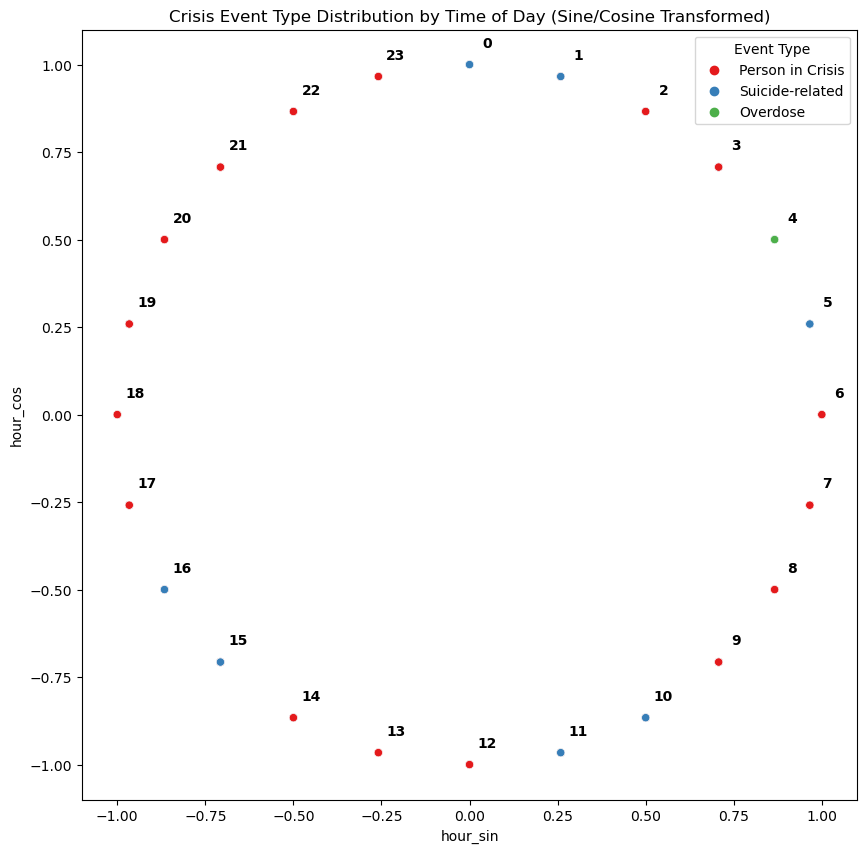

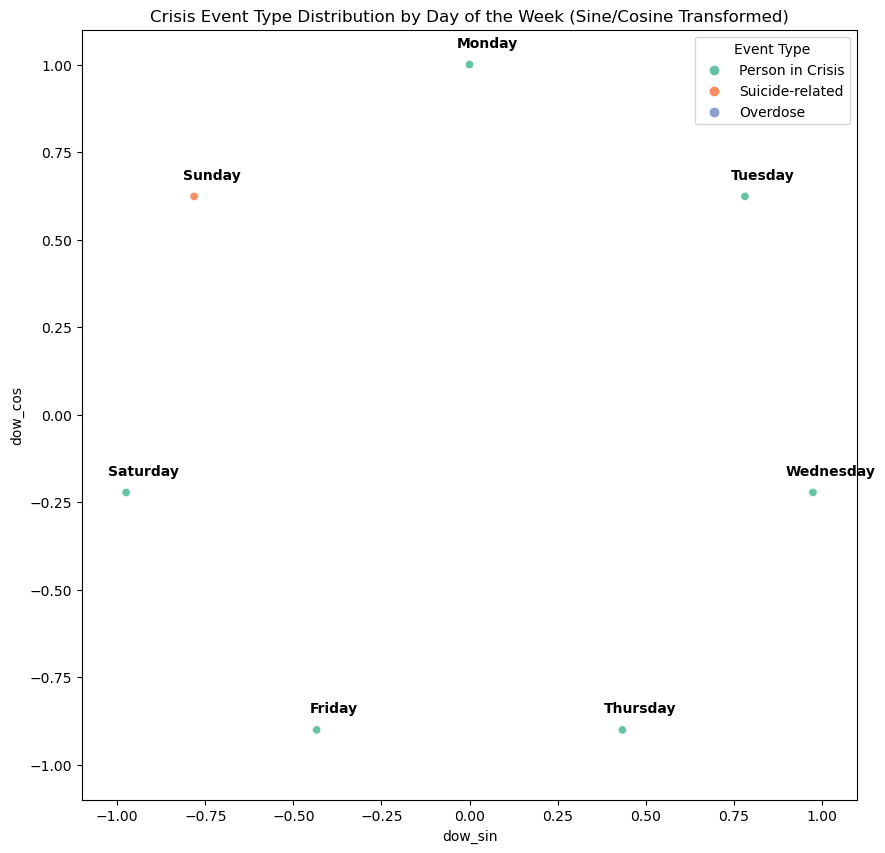

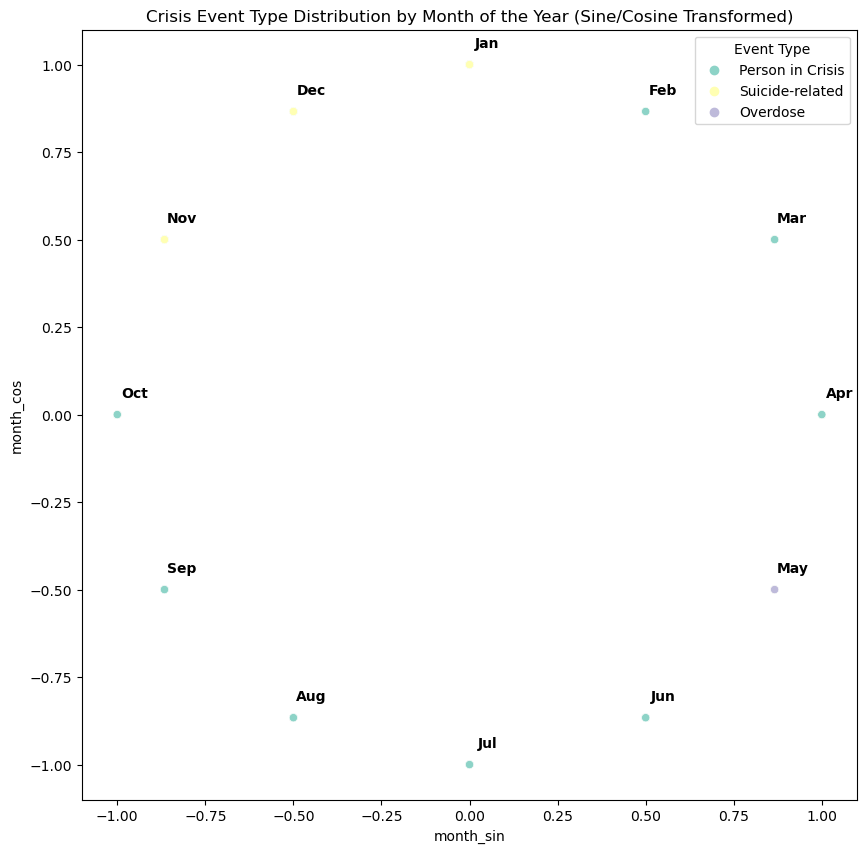

In [8]:
import numpy as np

# Text labels to avoid overlapping with points
offset_x = 0.05
offset_y = 0.05

# 1. Hour of the day: Relationship between EVENT_TYPE and time of day (hour_sin, hour_cos)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='hour_sin', y='hour_cos', hue='EVENT_TYPE', data=data, palette="Set1")

# Annotating hours to avoid overlap
hours = np.arange(0, 24, 1)
for hour in hours:
    hour_rad = 2 * np.pi * hour / 24
    plt.text(np.sin(hour_rad) + offset_x, np.cos(hour_rad) + offset_y, str(hour), 
             horizontalalignment='center', size='medium', color='black', weight='semibold', zorder=5)

plt.title('Crisis Event Type Distribution by Time of Day (Sine/Cosine Transformed)')
plt.xlabel('hour_sin')
plt.ylabel('hour_cos')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend(title='Event Type')
plt.show()

# 2. Day of the week: Relationship between EVENT_TYPE and day of the week (dow_sin, dow_cos)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='dow_sin', y='dow_cos', hue='EVENT_TYPE', data=data, palette="Set2")

# Annotating days oto avoid overlap
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, day in enumerate(days):
    day_rad = 2 * np.pi * i / 7
    plt.text(np.sin(day_rad) + offset_x, np.cos(day_rad) + offset_y, day, 
             horizontalalignment='center', size='medium', color='black', weight='semibold', zorder=5)

plt.title('Crisis Event Type Distribution by Day of the Week (Sine/Cosine Transformed)')
plt.xlabel('dow_sin')
plt.ylabel('dow_cos')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend(title='Event Type')
plt.show()

# 3. Month of the year: Relationship between EVENT_TYPE and month (month_sin, month_cos)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='month_sin', y='month_cos', hue='EVENT_TYPE', data=data, palette="Set3")

# Annotating months to avoid overlap
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, month in enumerate(months):
    month_rad = 2 * np.pi * i / 12
    plt.text(np.sin(month_rad) + offset_x, np.cos(month_rad) + offset_y, month, 
             horizontalalignment='center', size='medium', color='black', weight='semibold', zorder=5)

plt.title('Crisis Event Type Distribution by Month of the Year (Sine/Cosine Transformed)')
plt.xlabel('month_sin')
plt.ylabel('month_cos')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.legend(title='Event Type')
plt.show()


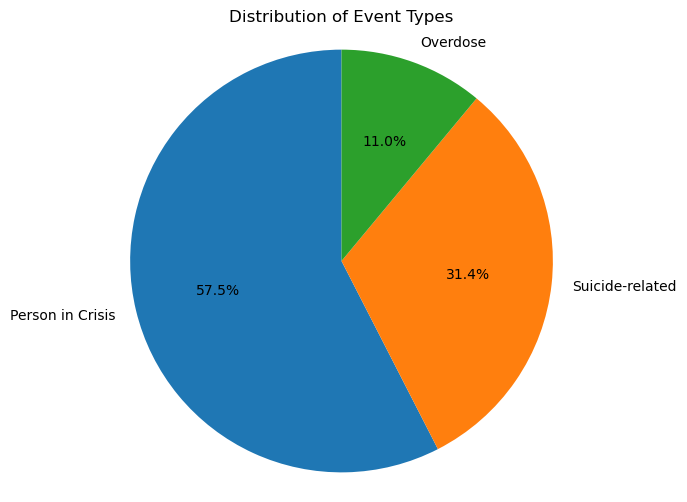

In [9]:
# Distribution of Event Types
event_type_counts = data['EVENT_TYPE'].value_counts()
plt.figure(figsize=(6, 6)) 
plt.pie(event_type_counts, labels=event_type_counts.index,startangle=90,autopct='%1.1f%%')
plt.title('Distribution of Event Types')  
plt.axis('equal') 
plt.show()

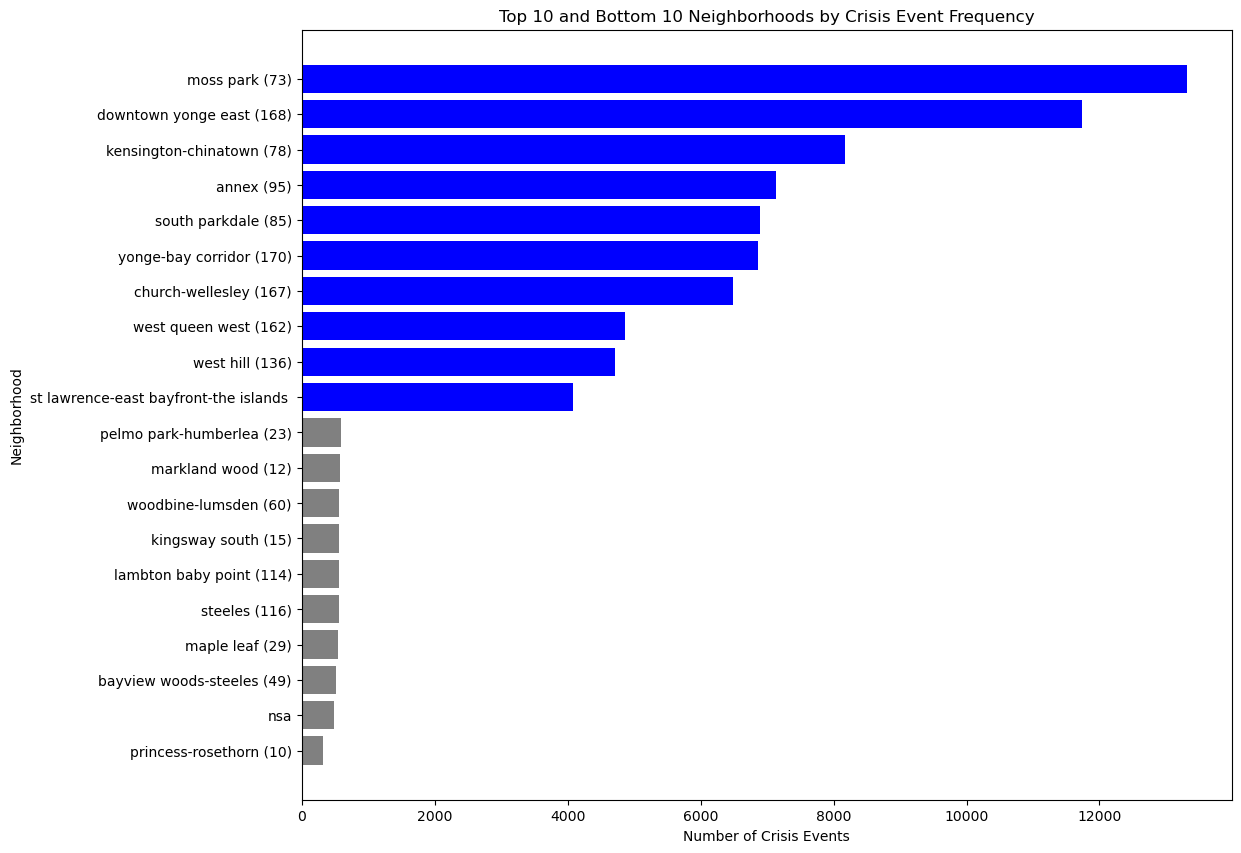

In [63]:
# Filter for rows where APPREHENSION_MADE is "1"
# Top 10 High-Risk Neighborhoods
top_neighborhood_counts = data['NEIGHBOURHOOD_158'].value_counts().head(10)

# Bottom 10 Low-Risk Neighborhoods
bottom_neighborhood_counts = data['NEIGHBOURHOOD_158'].value_counts().tail(10)

# Concatenate top and bottom neighborhoods
combined_neighborhood_counts = pd.concat([top_neighborhood_counts, bottom_neighborhood_counts])
combined_neighborhoods = combined_neighborhood_counts.index
combined_neighborhoods_counts = combined_neighborhood_counts.values

# Define colors: Blue for top, Grey for bottom
colors_combined = ['blue' if i < 10 else 'grey' for i in range(len(combined_neighborhoods))]

# Plotting the combined chart
plt.figure(figsize=(12, 10))  
plt.barh(combined_neighborhoods, combined_neighborhoods_counts, color=colors_combined)
plt.xlabel('Number of Crisis Events')
plt.ylabel('Neighborhood')
plt.title('Top 10 and Bottom 10 Neighborhoods by Crisis Event Frequency')
plt.gca().invert_yaxis()  
plt.show()

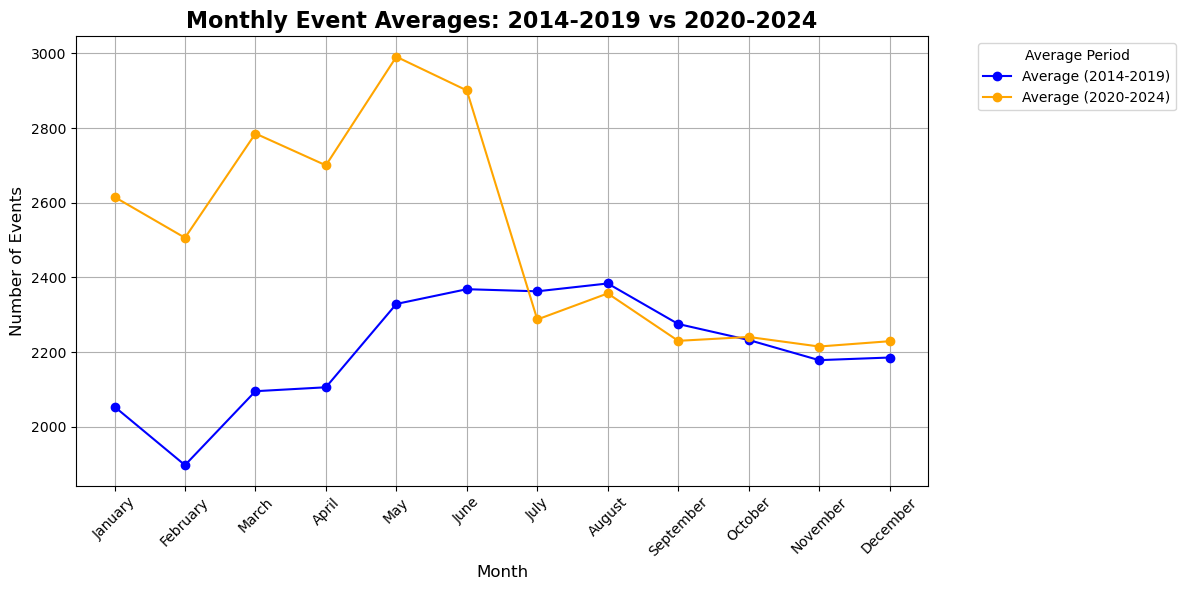

In [11]:

# Converting EVENT_DATE to datetime format
data['EVENT_DATE'] = pd.to_datetime(data['EVENT_DATE'])

# Extract year and month from the EVENT_DATE
data['Year'] = data['EVENT_DATE'].dt.year
data['Month'] = data['EVENT_DATE'].dt.month_name()

# Grouping by Year and Month, and count the number of events
monthly_trends = data.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Sort the columns to ensure months are in order
monthly_trends = monthly_trends.reindex(columns=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

avg_2014_2019 = monthly_trends.loc[2014:2019].mean()

avg_2020_2024 = monthly_trends.loc[2020:2024].mean()

# Creating a DataFrame to hold the average data for plotting
avg_data = pd.DataFrame({
    'Month': monthly_trends.columns,
    'Avg 2014-2019': avg_2014_2019.values,
    'Avg 2020-2024': avg_2020_2024.values
})

# Month as the index for  plotting
avg_data.set_index('Month', inplace=True)

# line chart
plt.figure(figsize=(12, 6))
plt.plot(avg_data.index, avg_data['Avg 2014-2019'], marker='o', linestyle='-', color='blue', label='Average (2014-2019)')
plt.plot(avg_data.index, avg_data['Avg 2020-2024'], marker='o', linestyle='-', color='orange', label='Average (2020-2024)')
plt.title('Monthly Event Averages: 2014-2019 vs 2020-2024', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Average Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


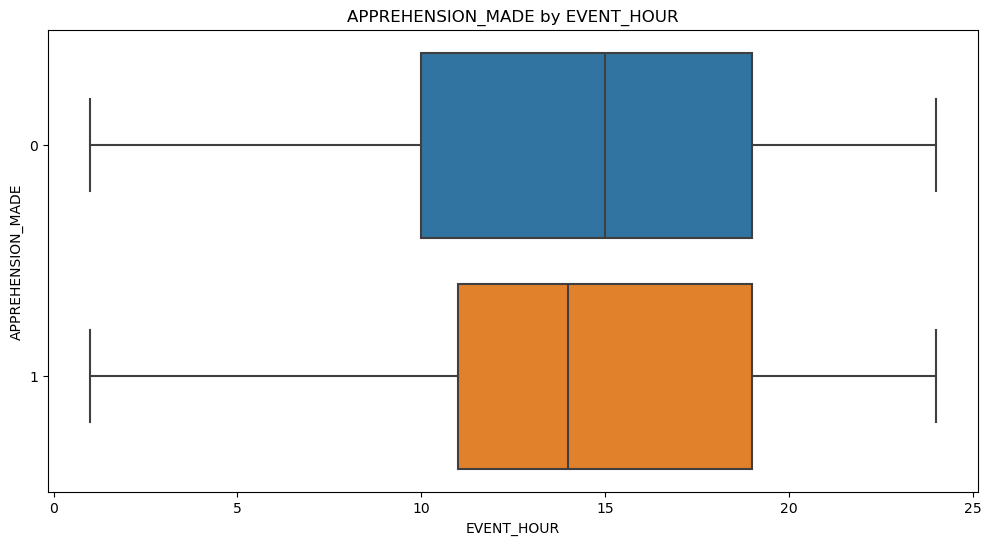

In [12]:
# Relationship between EVENT_HOUR and APPREHENSION_MADE
plt.figure(figsize=(12, 6))
sns.boxplot(x='EVENT_HOUR', y='APPREHENSION_MADE', data=data)
plt.title('APPREHENSION_MADE by EVENT_HOUR')
plt.xlabel('EVENT_HOUR')
plt.ylabel('APPREHENSION_MADE')
plt.show()


# Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

# Encoding target variable 'APPREHENSION_MADE'
label_encoder = LabelEncoder()
data['APPREHENSION_MADE'] = label_encoder.fit_transform(data['APPREHENSION_MADE'])

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['EVENT_TYPE'])

data = pd.get_dummies(data, columns=['DIVISION', 'OCCURRENCE_CREATED', 'WEEKEND_LABEL'], drop_first=False)

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: ['EVENT_DATE', 'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140', 'Month', 'EVENT_TYPE_Overdose', 'EVENT_TYPE_Person in Crisis', 'EVENT_TYPE_Suicide-related', 'DIVISION_d11', 'DIVISION_d12', 'DIVISION_d13', 'DIVISION_d14', 'DIVISION_d22', 'DIVISION_d23', 'DIVISION_d31', 'DIVISION_d32', 'DIVISION_d33', 'DIVISION_d41', 'DIVISION_d42', 'DIVISION_d43', 'DIVISION_d51', 'DIVISION_d52', 'DIVISION_d53', 'DIVISION_d54', 'DIVISION_d55', 'DIVISION_nsa', 'OCCURRENCE_CREATED_No', 'OCCURRENCE_CREATED_Yes', 'WEEKEND_LABEL_No', 'WEEKEND_LABEL_Yes']


In [55]:
data.dtypes

_id                                     int64
OBJECTID                                int64
EVENT_ID                                int64
EVENT_DATE                     datetime64[ns]
EVENT_YEAR                              int32
EVENT_HOUR                              int64
APPREHENSION_MADE                       int64
NEIGHBOURHOOD_158              string[python]
NEIGHBOURHOOD_140              string[python]
IS_WEEKEND                              int64
event_hour_weekend                      int64
day_of_week                             int32
month                                   int32
total_events_neighborhood               int64
hour_sin                              float64
hour_cos                              float64
dow_sin                               float64
dow_cos                               float64
month_sin                             float64
month_cos                             float64
Year                                    int32
Month                             

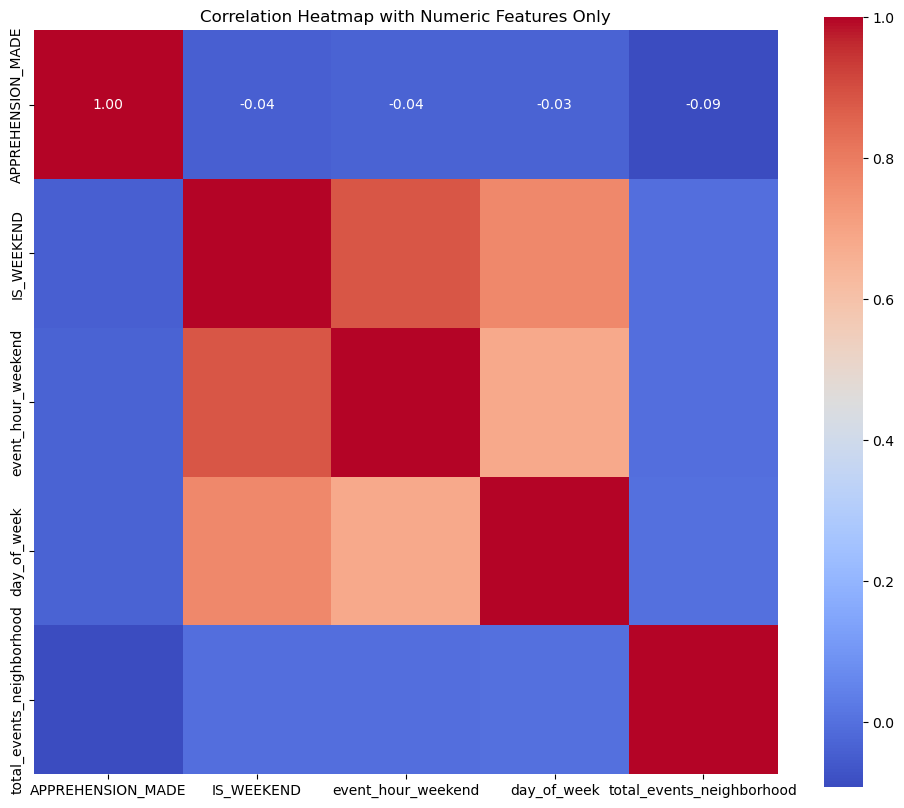

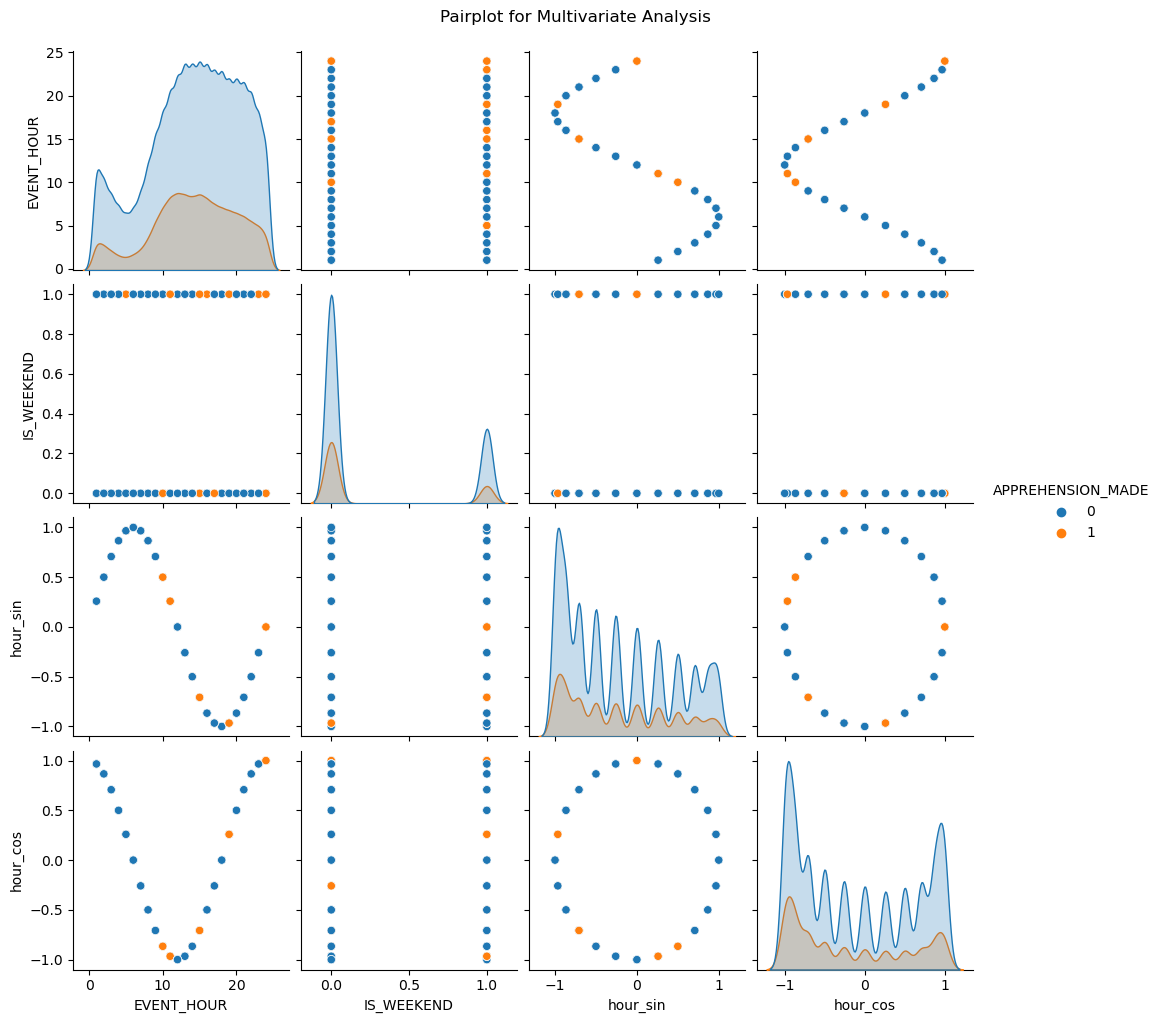

In [59]:
# Numeric columns for correlation
numeric_data = data[['APPREHENSION_MADE', 'IS_WEEKEND', 'event_hour_weekend', 'day_of_week', 'total_events_neighborhood']]
new_corr = numeric_data.corr()  # Calculate correlation for numeric features only

# Creating a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(new_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap with Numeric Features Only')
plt.show()

# Pairplot for multivariate analysis
pairplot_vars = ['EVENT_HOUR', 'IS_WEEKEND', 'hour_sin', 'hour_cos', 'APPREHENSION_MADE']
sns.pairplot(data[pairplot_vars], hue='APPREHENSION_MADE')
plt.suptitle('Pairplot for Multivariate Analysis', y=1.02)
plt.show()

# Logistic Regression

In [20]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc, accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore") 

# Preparing the Data

df= data.copy()
# Features and target variables
X = df.drop(columns=['_id', 'OBJECTID', 'EVENT_ID', 'EVENT_DATE', 'APPREHENSION_MADE'], axis=1)  # Drop non-feature columns
y = df['APPREHENSION_MADE']

# One-hot encode categorical variables (if any remain after dropping)
X = pd.get_dummies(X, drop_first=True)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Training the Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Evaluating the Model
y_pred = model.predict(X_test)

# classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89     69911
           1       0.64      0.93      0.76     22820

    accuracy                           0.85     92731
   macro avg       0.81      0.88      0.83     92731
weighted avg       0.89      0.85      0.86     92731

Confusion Matrix:
 [[57970 11941]
 [ 1694 21126]]


In [34]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 85.30%


In [35]:
# Training the Logistic Regression Model with Class Weights
model = LogisticRegression(random_state=42, class_weight='balanced', 
                                   max_iter=1000, solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Evaluating the Model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8532853091199275
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.89     69911
           1       0.64      0.94      0.76     22820

    accuracy                           0.85     92731
   macro avg       0.81      0.88      0.83     92731
weighted avg       0.89      0.85      0.86     92731

Confusion Matrix:
 [[57744 12167]
 [ 1438 21382]]


Confusion Matrix:
 [[57744 12167]
 [ 1438 21382]]


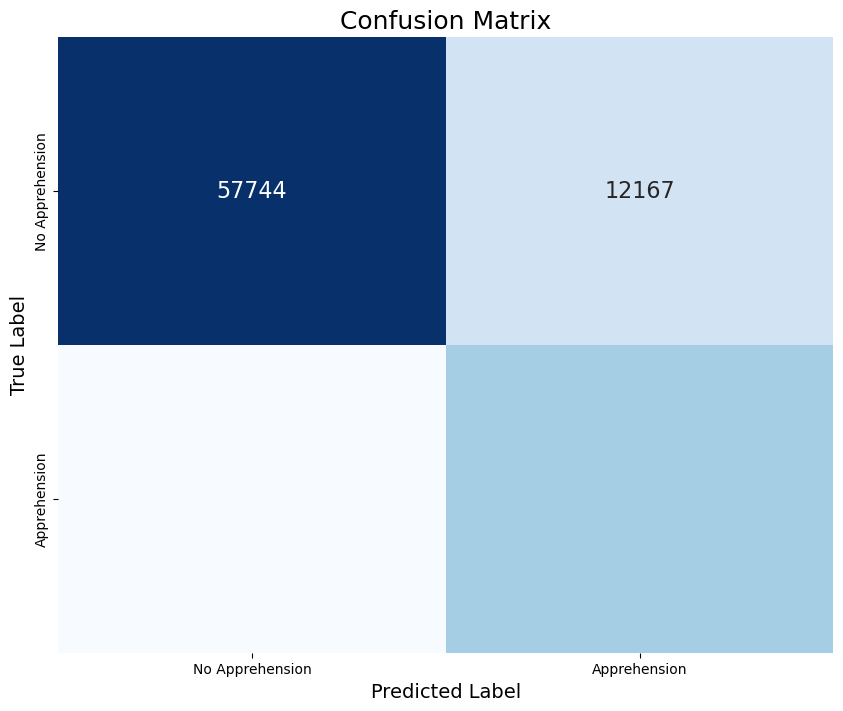

In [36]:
#Confusion matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Apprehension', 'Apprehension'],
            yticklabels=['No Apprehension', 'Apprehension'], 
            annot_kws={"size": 16})  # Increase font size for annotations
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

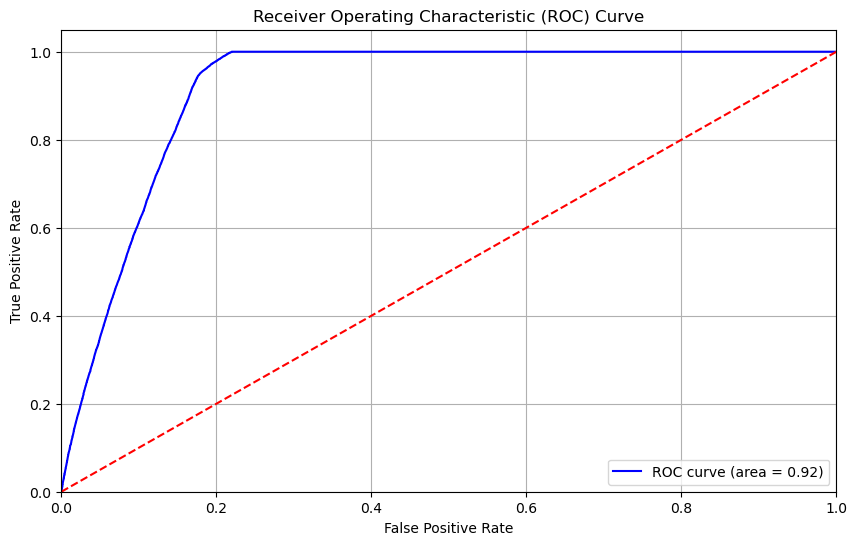

In [37]:
# AUC

from sklearn.metrics import roc_curve, roc_auc_score

# Predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (1)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Random Forest Classification with SMOTE


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

#  predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8451434795268034
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     69911
           1       0.64      0.83      0.72     22820

    accuracy                           0.85     92731
   macro avg       0.79      0.84      0.81     92731
weighted avg       0.87      0.85      0.85     92731

Confusion Matrix:
 [[59500 10411]
 [ 3949 18871]]


# Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = gb_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8546764296729249
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.90     69911
           1       0.64      0.95      0.76     22820

    accuracy                           0.85     92731
   macro avg       0.81      0.89      0.83     92731
weighted avg       0.90      0.85      0.86     92731

Confusion Matrix:
 [[57584 12327]
 [ 1149 21671]]



Top 10 Feature Importances:
                        Feature  Importance
36       OCCURRENCE_CREATED_Yes    0.603890
35        OCCURRENCE_CREATED_No    0.281059
16   EVENT_TYPE_Suicide-related    0.043327
15  EVENT_TYPE_Person in Crisis    0.027096
9                       dow_sin    0.010427
10                      dow_cos    0.008849
11                    month_sin    0.006115
12                    month_cos    0.003177
4                   day_of_week    0.003075
8                      hour_cos    0.002536


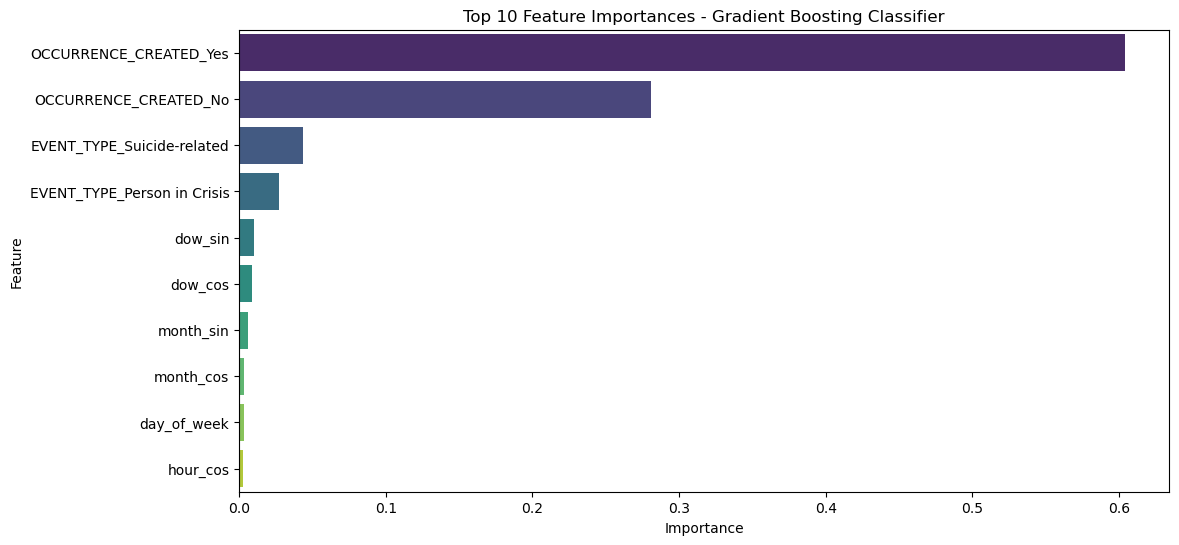

In [40]:
# Get feature importances
importances = gb_model.feature_importances_
feature_names = X_train_resampled.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features = feature_importances.head(10)

# Print the top 10 feature importances
print("\nTop 10 Feature Importances:")
print(top_10_features)

# Plotting the top 10 feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Feature Importances - Gradient Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

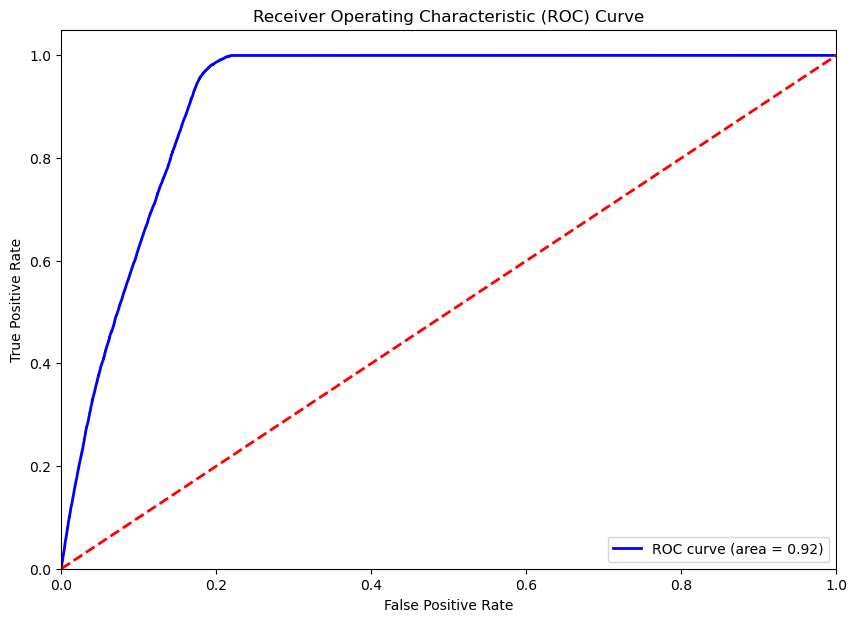

In [41]:
from sklearn.metrics import roc_curve, auc as calculate_auc 

# ROC Curve
y_prob = gb_model.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_value = calculate_auc(fpr, tpr)  # Used the aliased auc function

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Cost-sensitive Learning


In [42]:
# class weights: higher weight for the minority class (1 - apprehension)
class_weights = {0: 1, 1: 3}  # Adjust weights as needed

# Gradient Boosting Classifier with class weights
gb_model = GradientBoostingClassifier(random_state=42)

# training data with sample weights
gb_model.fit(X_train_resampled, y_train_resampled)

#  predictions on the test set
y_pred = gb_model.predict(X_test)


In [43]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# feature importances
importances = gb_model.feature_importances_
feature_names = X_train_resampled.columns

# DataFrame for better visualization of feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features = feature_importances.head(10)

# Print the top 10 feature importances
print("\nTop 10 Feature Importances:")
print(top_10_features)

Accuracy: 0.8546764296729249
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.90     69911
           1       0.64      0.95      0.76     22820

    accuracy                           0.85     92731
   macro avg       0.81      0.89      0.83     92731
weighted avg       0.90      0.85      0.86     92731

Confusion Matrix:
 [[57584 12327]
 [ 1149 21671]]

Top 10 Feature Importances:
                        Feature  Importance
36       OCCURRENCE_CREATED_Yes    0.603890
35        OCCURRENCE_CREATED_No    0.281059
16   EVENT_TYPE_Suicide-related    0.043327
15  EVENT_TYPE_Person in Crisis    0.027096
9                       dow_sin    0.010427
10                      dow_cos    0.008849
11                    month_sin    0.006115
12                    month_cos    0.003177
4                   day_of_week    0.003075
8                      hour_cos    0.002536


# K-Means Clustering

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import itertools
import scipy.cluster.hierarchy as sch
from sklearn.utils import resample


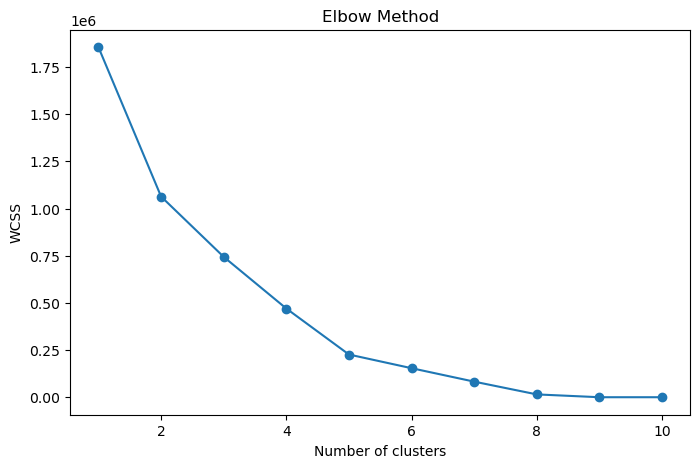

In [45]:
# features for clustering

features = [ 'OCCURRENCE_CREATED_No',
            'OCCURRENCE_CREATED_Yes', 'APPREHENSION_MADE', 
            'EVENT_TYPE_Overdose', 'EVENT_TYPE_Person in Crisis', 
            'EVENT_TYPE_Suicide-related']

# Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [46]:
#  K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(scaled_features)

data['Cluster'] = kmeans.labels_

# centroids and silhouette score
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)
print("Centroids:\n", centroid_df)


Centroids:
    OCCURRENCE_CREATED_No  OCCURRENCE_CREATED_Yes  APPREHENSION_MADE  \
0           9.880985e-15            1.000000e+00      -4.746203e-15   
1           1.000000e+00           -3.463896e-14      -1.823541e-14   
2           1.000000e+00            6.589174e-14       4.810041e-14   
3          -2.775558e-14            1.000000e+00       1.000000e+00   
4          -2.253753e-14            1.000000e+00       1.000000e+00   
5           1.000000e+00           -9.103829e-15      -1.165734e-15   
6          -6.439294e-15            1.000000e+00       1.387779e-15   
7           5.218048e-15            1.000000e+00      -3.885781e-15   
8          -9.992007e-16            1.000000e+00       1.000000e+00   
9           1.000000e+00            0.000000e+00       0.000000e+00   

   EVENT_TYPE_Overdose  EVENT_TYPE_Person in Crisis  \
0         1.000000e+00                -6.217249e-15   
1         3.885781e-15                 3.819167e-14   
2        -2.992051e-14                 1.

In [47]:
# random sample of the data
sample_size = 30000  # Adjust based on your dataset size
scaled_sample, labels_sample = resample(scaled_features, kmeans.labels_, n_samples=sample_size, random_state=42)

silhouette_avg = silhouette_score(scaled_sample, labels_sample)
print("Sampled Average Silhouette Score:", silhouette_avg)

Sampled Average Silhouette Score: 0.9999999977114


In [48]:

# Check the number of rows in data
print("Original Data Size:", data.shape)

# Select features for PCA
features_for_pca = ['OCCURRENCE_CREATED_No', 'OCCURRENCE_CREATED_Yes', 'APPREHENSION_MADE', 
                    'EVENT_TYPE_Overdose', 'EVENT_TYPE_Person in Crisis', 
                    'EVENT_TYPE_Suicide-related']

# Features Scaling
scaler = StandardScaler()
scaled_features_for_pca = scaler.fit_transform(data[features_for_pca])

# PCA
pca = PCA(n_components=3)  # We want to create 3 principal components
principal_components = pca.fit_transform(scaled_features_for_pca)

# DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

pc_df['Cluster'] = data['Cluster'].values 



Original Data Size: (309103, 48)


In [49]:
# Group by Cluster and mean, median, and standard deviation
cluster_profile = data.groupby('Cluster')[features_for_pca].agg(['mean', 'median', 'std'])
print(cluster_profile)

        OCCURRENCE_CREATED_No             OCCURRENCE_CREATED_Yes              \
                         mean median  std                   mean median  std   
Cluster                                                                        
0                         0.0    0.0  0.0                    1.0    1.0  0.0   
1                         1.0    1.0  0.0                    0.0    0.0  0.0   
2                         1.0    1.0  0.0                    0.0    0.0  0.0   
3                         0.0    0.0  0.0                    1.0    1.0  0.0   
4                         0.0    0.0  0.0                    1.0    1.0  0.0   
5                         1.0    1.0  0.0                    0.0    0.0  0.0   
6                         0.0    0.0  0.0                    1.0    1.0  0.0   
7                         0.0    0.0  0.0                    1.0    1.0  0.0   
8                         0.0    0.0  0.0                    1.0    1.0  0.0   

        APPREHENSION_MADE             E

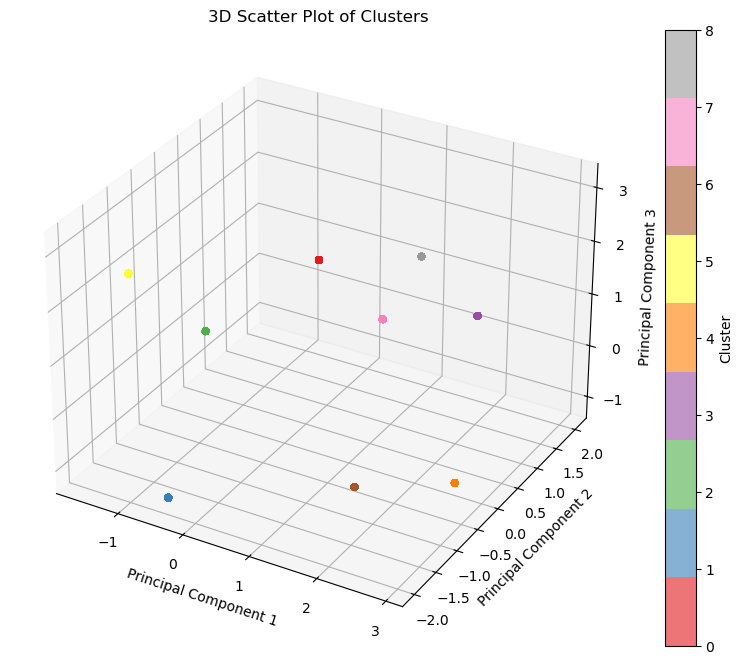

In [50]:
# 3D Scatter Plot of PCA Components

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], c=pc_df['Cluster'], cmap='Set1', alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D Scatter Plot of Clusters')
plt.colorbar(scatter, label='Cluster')
plt.show()


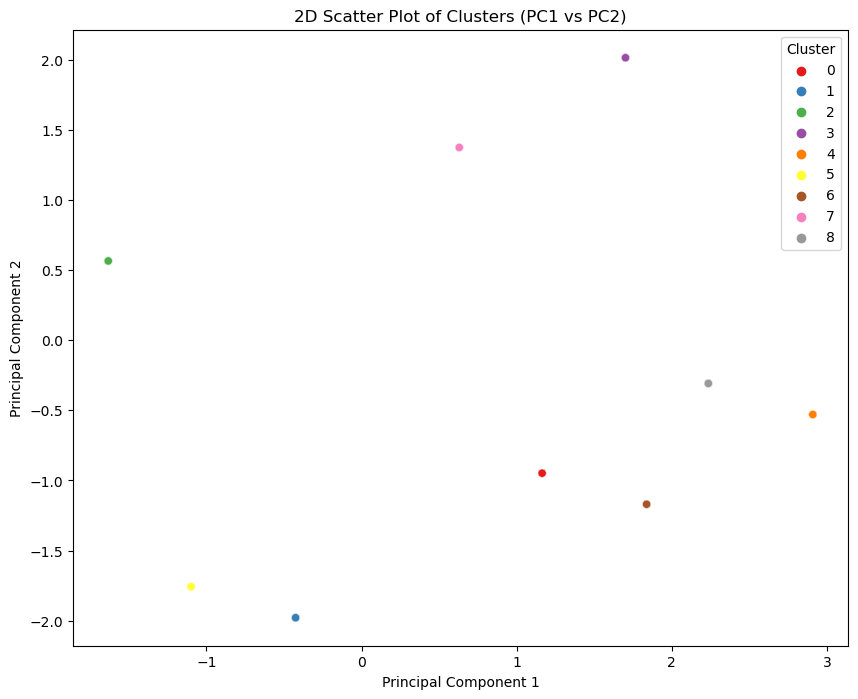

In [51]:
# 2D Scatter Plots of Principal Components

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='Set1', alpha=0.6)
plt.title('2D Scatter Plot of Clusters (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

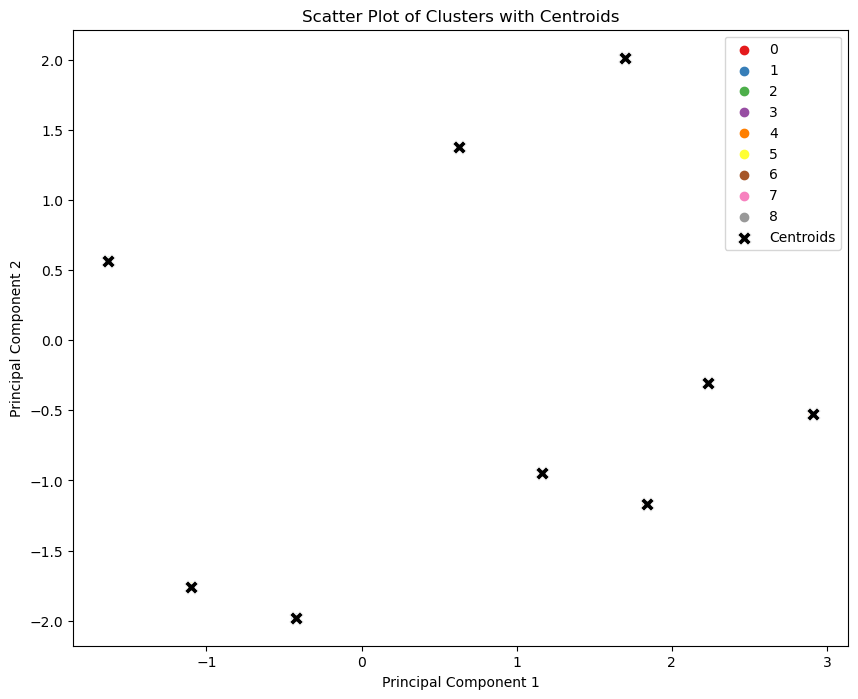

In [52]:
# Centroid Plot

# centroids for PC1 and PC2
centroids = pc_df.groupby('Cluster')[['PC1', 'PC2']].mean().reset_index()

# scatter plot with centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='Set1', alpha=0.6)
sns.scatterplot(x='PC1', y='PC2', data=centroids, color='black', marker='X', s=100, label='Centroids')
plt.title('Scatter Plot of Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Random Forest Classifier uisng K Folds

In [54]:
from sklearn.model_selection import StratifiedKFold

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)


X = X_train_resampled 
y = y_train_resampled 

#  k-fold cross-validation
k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Storing metrics
accuracies = []
class_reports = []
confusion_matrices = []

#  k-fold cross-validation
for train_index, test_index in skf.split(X, y):
    # Use of .iloc to access rows by index
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    #  predictions
    y_pred = rf_model.predict(X_test)
    
    # Evaluate the model
    accuracies.append(accuracy_score(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred, output_dict=True))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

#  average accuracy
average_accuracy = np.mean(accuracies)

print("Average Accuracy:", average_accuracy)

for i in range(k):
    print(f"\nClassification Report for Fold {i + 1}:\n", class_reports[i])
    print(f"Confusion Matrix for Fold {i + 1}:\n", confusion_matrices[i])


Average Accuracy: 0.9037492482991262

Classification Report for Fold 1:
 {'0': {'precision': 0.9539342114336943, 'recall': 0.8479740084595108, 'f1-score': 0.8978386447718569, 'support': 32626}, '1': {'precision': 0.8631686391348727, 'recall': 0.9590498084291188, 'f1-score': 0.9085866945436595, 'support': 32625}, 'accuracy': 0.9035110573018038, 'macro avg': {'precision': 0.9085514252842835, 'recall': 0.9035119084443148, 'f1-score': 0.9032126696577583, 'support': 65251}, 'weighted avg': {'precision': 0.9085521207952512, 'recall': 0.9035110573018038, 'f1-score': 0.9032125872984859, 'support': 65251}}
Confusion Matrix for Fold 1:
 [[27666  4960]
 [ 1336 31289]]

Classification Report for Fold 2:
 {'0': {'precision': 0.955858969927411, 'recall': 0.8476015325670498, 'f1-score': 0.8984810332223214, 'support': 32625}, '1': {'precision': 0.8631094958839239, 'recall': 0.9608594372586281, 'f1-score': 0.9093651645466809, 'support': 32626}, 'accuracy': 0.9042313527762027, 'macro avg': {'precision':